In [1]:
#Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Reading the data

data=pd.read_csv('nyc_taxi_trip_duration.csv')

In [3]:
#Checking for null values

data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [4]:
#checking for data types
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [5]:
# converting strings to datetime features
data['pickup_datetime'] = pd.to_datetime(data.pickup_datetime)
data['dropoff_datetime'] = pd.to_datetime(data.dropoff_datetime)

# Converting yes/no flag to 1 and 0
data['store_and_fwd_flag'] = 1 * (data.store_and_fwd_flag.values == 'Y')

In [6]:
#Feature engineering on datetime values

data['pickup_dayofweek'] = data['pickup_datetime'].dt.dayofweek
#data['dropoff_dayofweek'] = data['dropoff_datetime'].dt.dayofweek


data['pickup_month'] = data['pickup_datetime'].dt.month
#data['dropoff_month'] = data['dropoff_datetime'].dt.month

data['pickup_week'] = data['pickup_datetime'].dt.week
#data['dropoff_week'] = data['dropoff_datetime'].dt.week

data['pickup_day'] = data['pickup_datetime'].dt.day
#data['dropoff_day'] = data['dropoff_datetime'].dt.day


data['pickup_hour'] = data['pickup_datetime'].dt.hour
#data['dropoff_hour'] = data['dropoff_datetime'].dt.hour




In [7]:
#Calculating trip distance from longitude and Latitude values

from math import sin, cos, sqrt, atan2, radians

def Distance(row):
    R = 6373.0  # approximate radius of earth in km
    x = radians(row['pickup_latitude'])
    y = radians(row['pickup_longitude'])
    x1 = radians(row['dropoff_latitude'])
    y1 = radians(row['dropoff_longitude'])
    
    d1 = y1 - y
    d2 = x1 - x
    
    x3 = sin(d2 / 2)**2 + cos(x) * cos(x1) * sin(d1 / 2)**2
    y3 = 2 * atan2(sqrt(x3), sqrt(1 - x3))
    result = R * y3
    
    return result

In [8]:
data['trip_distance'] = data.apply(lambda row: Distance(row), axis= 1)
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_dayofweek,pickup_month,pickup_week,pickup_day,pickup_hour,trip_distance
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,0,400,0,2,9,29,16,1.199449
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,0,1100,4,3,10,11,23,4.130407
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,0,1635,6,2,7,21,17,7.253029
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,0,1141,1,1,1,5,9,2.361839
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,0,848,2,2,7,17,6,4.329893


In [9]:
#checking for outliers

data['trip_duration'].describe()/3600

count    202.589444
mean       0.264508
std        1.073507
min        0.000278
25%        0.110278
50%        0.184167
75%        0.298611
max      538.815556
Name: trip_duration, dtype: float64

In [10]:
#removing outliers

Q1 = data['trip_duration'].quantile(0.25)
Q3 = data['trip_duration'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (data['trip_duration'] >= Q1 - 1.5 * IQR) & (data['trip_duration'] <= Q3 + 1.5 *IQR)
data_cleaned= data.loc[filter]  

In [11]:
data_cleaned['trip_duration'].describe()/3600

count    192.321944
mean       0.203375
std        0.124510
min        0.000278
25%        0.106667
50%        0.175556
75%        0.275556
max        0.581111
Name: trip_duration, dtype: float64

In [12]:
data_predict=data_cleaned

In [13]:
#seperating independent and dependent variables
x = data_predict.drop(['id','dropoff_datetime','pickup_datetime','dropoff_longitude','pickup_longitude','dropoff_latitude','pickup_latitude','trip_duration'],axis=1)
y =data_predict['trip_duration']
x.shape, y.shape

((692359, 9), (692359,))

In [14]:
## Importing the MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [15]:
x = pd.DataFrame(x_scaled, columns = x.columns)

In [16]:
x.head()

,vendor_id,passenger_count,store_and_fwd_flag,pickup_dayofweek,pickup_month,pickup_week,pickup_day,pickup_hour,trip_distance
0,1.0,0.111111,0.0,0.000000,0.2,0.153846,0.933333,0.695652,0.000966
1,0.0,0.222222,0.0,0.666667,0.4,0.173077,0.333333,1.000000,0.003327
2,1.0,0.222222,0.0,1.000000,0.2,0.115385,0.666667,0.739130,0.005843
3,1.0,0.666667,0.0,0.166667,0.0,0.000000,0.133333,0.391304,0.001903
4,0.0,0.111111,0.0,0.333333,0.2,0.115385,0.533333,0.260870,0.003488


In [17]:
y.head()

0     400
1    1100
2    1635
3    1141
4     848
Name: trip_duration, dtype: int64

In [18]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x , y, random_state=56)

In [19]:
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

In [20]:
# Creating instance of KNN
reg = KNN(n_neighbors = 8)

In [21]:
# Fitting the model
reg.fit(train_x, train_y)


KNeighborsRegressor(n_neighbors=8)

In [22]:
# Predicting over the Test Set and calculating MSE
test_predict = reg.predict(test_x)
k = mse(test_predict, test_y)
print('Test MSE    ', k )

Test MSE     109275.15509046955


In [23]:
#Predicting over the Train set and Calculating MSE

test_predict = reg.predict(train_x)
k = mse(test_predict, train_y)
print('Test MSE    ', k )

Test MSE     82917.06918566051


In [24]:
#finding best value of k neighbours

def Elbow(K):
  #initiating empty list
    test_mse = []
  
  #training model for evey value of K
    for i in K:
        #Instance of KNN
        reg = KNN(n_neighbors = i)
        reg.fit(train_x, train_y)
        #Appending mse value to empty list claculated using the predictions
        tmp = reg.predict(test_x)
        tmp = mse(tmp,test_y)
        test_mse.append(tmp)
    
    return test_mse

In [25]:
#Defining K range
k = range(1,40)

In [26]:
# calling above defined function
test = Elbow(k)

Text(0.5, 1.0, 'Elbow Curve for test')

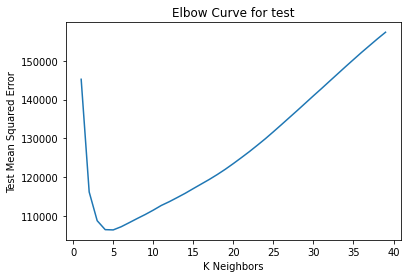

In [27]:
# plotting the Curves
plt.plot(k, test)
plt.xlabel('K Neighbors')
plt.ylabel('Test Mean Squared Error')
plt.title('Elbow Curve for test')

In [ ]:
#we can see error is less when K is 5

# Creating instance of KNN

reg = KNN(n_neighbors = 5)

# Fitting the model
reg.fit(train_x, train_y)

# Predicting over the Train Set and Test Set
test_predict = reg.predict(test_x)
train_predict=reg.predict(train_x)


In [ ]:
#Evaluation


k = mse(train_predict, train_y)
print('Train MSE    ', k )
m = mse(test_predict, test_y)
print('Test MSE    ', m )


j=mse(train_predict,train_y,squared=False)
print('Train RMSE   ',j)
n=mse(test_predict,test_y,squared=False)
print('Test RMSE   ',n)

l=mae(train_predict, train_y)
print('Train MAE    ',l)
o=mae(test_predict, test_y)
print('Test MAE    ',o)


In [ ]:
name2=['Train MSE','Test MSE']
values2=[k,m]
name3=['Train RMSE','Test RMSE']
values3=[j,n]
name4=['Train MAE','Test MAE']
values4=[l,o]

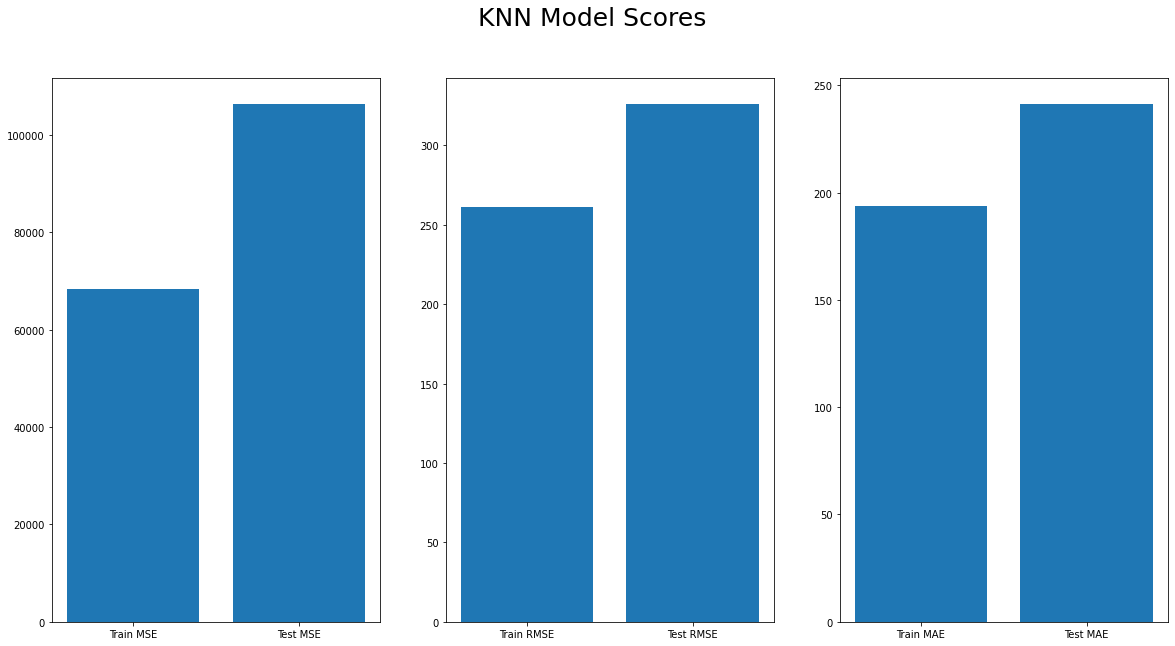

In [54]:
fig, ax = plt.subplots(1,3,figsize=(20,10))
fig.suptitle("KNN Model Scores", fontsize= 25)
ax[0].bar(name2, values2)
ax[1].bar(name3, values3)
ax[2].bar(name4, values4)
plt.show()